In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import torch
import numpy as np
import pickle

Data from https://github.com/GregaVrbancic/Phishing-Dataset

In [4]:
df = pd.read_csv("data/dataset_full.csv")
df

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,3,0,0,1,0,0,0,0,0,0,...,1,2,0,892,0,0,0,0,0,1
1,5,0,1,3,0,3,0,2,0,0,...,1,2,1,9540,1,0,0,0,0,1
2,2,0,0,1,0,0,0,0,0,0,...,1,2,3,589,1,0,0,0,0,0
3,4,0,2,5,0,0,0,0,0,0,...,1,2,0,292,1,0,0,0,0,1
4,2,0,0,0,0,0,0,0,0,0,...,1,2,1,3597,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88642,3,1,0,0,0,0,0,0,0,0,...,1,3,1,3597,0,0,0,0,0,0
88643,2,0,0,0,0,0,0,0,0,0,...,1,2,2,591,0,2,0,0,0,0
88644,2,1,0,5,0,0,0,0,0,0,...,1,2,5,14391,1,0,0,0,0,1
88645,2,0,0,1,0,0,0,0,0,0,...,1,1,1,52,1,0,0,0,0,1


### Setting up

In [5]:
from sklearn.model_selection import train_test_split

x = df.drop(labels='phishing', axis=1)
y = df['phishing']
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.1, random_state=19)

In [6]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

def evaluate(model, model_name):
    fig, axs = plt.subplots(1, 2)
    axs = axs.flatten()

    ## training accuracy
    train_pred = model.predict(train_x)
    print("%s Train Accuracy %.3f" % (model_name, accuracy_score(train_y, train_pred)))
    confusion = confusion_matrix(train_y, train_pred, normalize='true')
    ConfusionMatrixDisplay(confusion).plot(ax=axs[0], colorbar=False, cmap='Blues')
    axs[0].set_title("Train Data")
    # plt.show()

    test_pred = model.predict(test_x)
    print("%s Test Accuracy %.3f" % (model_name, accuracy_score(test_y, test_pred)))
    confusion = confusion_matrix(test_y, test_pred, normalize='true')
    ConfusionMatrixDisplay(confusion).plot(ax=axs[1], colorbar=False, cmap='Blues')
    axs[1].set_title("Test Data")

    plt.suptitle(model_name)
    plt.tight_layout()
    plt.show()


In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier


models = [LinearSVC(dual=False),
          KNeighborsClassifier(), 
          LogisticRegression(max_iter=5000), 
          DecisionTreeClassifier(max_depth=5),
          GaussianNB(),
          AdaBoostClassifier(),
          MLPClassifier()
]
names = ["SVM",
         "KNN",
         "Logistic Regression",
         "Decision Tree",
         "Naive Bayes",
         "AdaBoost",
         "MLP"]

acc = np.ndarray((7, 10))

for i, model in enumerate(models):
    accuracy = []
    min_accuracy = []
    maj_accuracy = []

    trial_min_acc = []
    trial_maj_acc = []
    trial_acc = []
    for t in range(10):
        subset_x = train_x.sample(10000)
        subset_y = train_y.loc[subset_x.index]
        model.fit(subset_x, subset_y)
        test_pred = model.predict(test_x)
        acc[i, t] = accuracy_score(test_y, test_pred)
        print(i, t, acc[i, t])

pickle.dump(acc, open("accuracy.pk", 'wb'))

0 0 0.9265651438240271
0 1 0.9173152848279752
0 2 0.9213761985335589
0 3 0.9201353637901861
0 4 0.9210377890580936
0 5 0.9202481669486746
0 6 0.9218274111675127
0 7 0.9202481669486746
0 8 0.9150592216582064
0 9 0.9230682459108855
1 0 0.8248166948674562
1 1 0.8212069937958263
1 2 0.8205301748448957
1 3 0.8257191201353637
1 4 0.8293288212069938
1 5 0.8228990411731528
1 6 0.8205301748448957
1 7 0.824478285391991
1 8 0.8258319232938522
1 9 0.82165820642978
2 0 0.920360970107163
2 1 0.9204737732656514
2 2 0.9172024816694867
2 3 0.9197969543147209
2 4 0.9210377890580936
2 5 0.9174280879864636
2 6 0.9134799774393683
2 7 0.9170896785109983
2 8 0.9201353637901861
2 9 0.9256627185561196
3 0 0.9319796954314721
3 1 0.9319796954314721
3 2 0.9256627185561196
3 3 0.9281443880428653
3 4 0.9287084038353074
3 5 0.9310772701635646
3 6 0.9271291596164692
3 7 0.9308516638465877
3 8 0.9315284827975183
3 9 0.9326565143824027
4 0 0.8574168076706148
4 1 0.8472645234066554
4 2 0.8119571347997744
4 3 0.843316412

[[0.92656514 0.91731528 0.9213762  0.92013536 0.92103779 0.92024817
  0.92182741 0.92024817 0.91505922 0.92306825]
 [0.82481669 0.82120699 0.82053017 0.82571912 0.82932882 0.82289904
  0.82053017 0.82447829 0.82583192 0.82165821]
 [0.92036097 0.92047377 0.91720248 0.91979695 0.92103779 0.91742809
  0.91347998 0.91708968 0.92013536 0.92566272]
 [0.9319797  0.9319797  0.92566272 0.92814439 0.9287084  0.93107727
  0.92712916 0.93085166 0.93152848 0.93265651]
 [0.85741681 0.84726452 0.81195713 0.84331641 0.86328257 0.83699944
  0.82797518 0.86407219 0.84455725 0.8392555 ]
 [0.93874788 0.93085166 0.92983644 0.9357022  0.93502538 0.92994924
  0.93051325 0.93502538 0.93085166 0.92938522]
 [0.87783418 0.77518331 0.88426396 0.79368302 0.89441624 0.9107727
  0.89960519 0.83271292 0.83745065 0.857304  ]]
                            0         1         2         3         4  \
SVM                  0.926565  0.917315  0.921376  0.920135  0.921038   
KNN                  0.824817  0.821207  0.820530

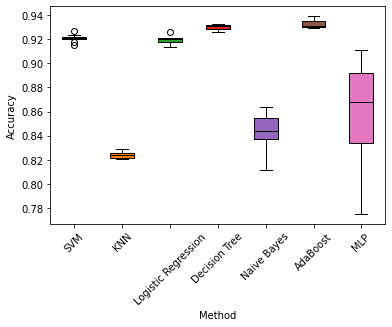

In [26]:

names = ["SVM",
         "KNN",
         "Logistic Regression",
         "Decision Tree",
         "Naive Bayes",
         "AdaBoost",
         "MLP"]

acc = pickle.load(open("accuracy.pk", 'rb'))
print(acc)
# acc = torch.randn(7, 10)
df = pd.DataFrame(acc, index=names)

print(df)
box = plt.boxplot(df.T, patch_artist=True)

colors = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

for median in box['medians']:
    median.set_color('black')

plt.xticks(range(1, 8), names, rotation=45)
plt.ylabel("Accuracy")
plt.xlabel("Method")
plt.show()


## Imbalance

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
import sklearn.preprocessing

models = [LinearSVC(dual=False),
          KNeighborsClassifier(), 
          LogisticRegression(max_iter=1000), 
          DecisionTreeClassifier(max_depth=5),
          GaussianNB(),
          AdaBoostClassifier(),
          MLPClassifier()
]
names = ["SVM",
         "KNN",
         "Logistic",
         "Decision Tree",
         "Naive Bayes",
         "AdaBoost",
         "MLP"]


phish_true = train_y[train_y == True]
phish_false = train_y[train_y == False]

splits = torch.linspace(0, 0.5, 11)[1:]#[0.1, 0.2, 0.3, 0.5]

acc = np.ndarray((7, len(splits), 3))

for h, split in enumerate(splits):
    print(split)
    n_true = int(split * 10000)
    new_true = phish_true.sample(n_true)
    new_false = phish_false.sample(10000-n_true)
    new_y = pd.concat([new_true, new_false])
    new_x = train_x.loc[new_y.index]

    for i, model in enumerate(models):
        model.fit(new_x, new_y)
        test_pred = model.predict(test_x)
        acc[i, h, 0] = accuracy_score(test_y, test_pred)
        confusion = confusion_matrix(test_y, test_pred, normalize='true')
        acc[i, h, 1] = confusion[0, 0] / confusion[0].sum()
        acc[i, h, 2] = confusion[1, 1] / confusion[1].sum()

pickle.dump(acc, open("accuracy_imbalance_nopre.pk", 'wb'))

tensor(0.0500)
tensor(0.1000)
tensor(0.1500)
tensor(0.2000)


/home/lily_l/miniconda/envs/phish/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


tensor(0.2500)


/home/lily_l/miniconda/envs/phish/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


tensor(0.3000)
tensor(0.3500)


/home/lily_l/miniconda/envs/phish/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


tensor(0.4000)


/home/lily_l/miniconda/envs/phish/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


tensor(0.4500)


/home/lily_l/miniconda/envs/phish/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


tensor(0.5000)


[[0.8177101  0.98766933 0.50273576]
 [0.88087986 0.85376867 0.93112327]
 [0.87456289 0.86384161 0.89443193]
 [0.86001128 0.96752345 0.66076601]
 [0.89238579 0.92167419 0.8381075 ]
 [0.8856176  0.85984717 0.93337625]
 [0.84749013 0.97377562 0.61345349]
 [0.90761421 0.9428621  0.8422916 ]
 [0.89746193 0.91524835 0.86449952]
 [0.90445572 0.93122612 0.8548439 ]]


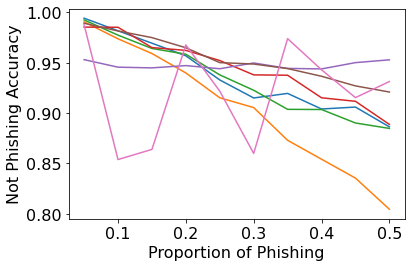

In [52]:
acc = pickle.load(open("accuracy_imbalance_nopre.pk", 'rb'))
print(acc[-1])
plt.rcParams.update({'font.size': 16})

for i, model in enumerate(models):
    accuracy = []
    for h, split in enumerate(splits):
        accuracy.append(acc[i, h, 1])
    plt.plot(splits, accuracy, label=names[i])
# plt.xscale("log")
# plt.legend()
plt.xlabel("Proportion of Phishing")
plt.ylabel("Not Phishing Accuracy")
plt.tight_layout()
plt.savefig("imbalance_acc_nophish.pdf")
plt.savefig("imbalance_acc_nophish.png", dpi=500)

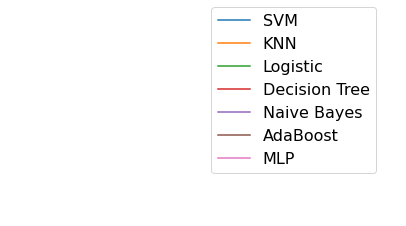

In [49]:

for i, model in enumerate(models):
    accuracy = []
    for h, split in enumerate(splits):
        accuracy.append(acc[i, h, 0])
    plt.plot(0, 0, label=names[i])
# plt.xscale("log")
plt.legend(ncol=1, loc='upper left', bbox_to_anchor=(0.5, 1.55), fancybox=True, frameon=True, shadow=False)
plt.gca().set_axis_off()
plt.tight_layout()
plt.savefig("legend.pdf")
plt.savefig("legend.png", dpi=500)